# CapgMyo comparison

Select four random channels and compare with ENG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import gc
gc.collect()

import sys
sys.path.append('../../Share/')
sys.path.append('../../Share/Manual_processing/')
import Model, utils, Same_with_MATLAB, Feature_info

import capgmyo_modules
f_path = 'C:/Users/hml76/Desktop/Jupyter/Datasets/CapgMyo/DB_A_preproceesed/'

In [13]:
idx = np.random.choice(128, size=4, replace=False)
def inter_session_run(idx):
    ACC_lst = []

    for SUB in range(1,10):
        print('Sub {}'.format(SUB))
        rep_lst = []
        for rep in [5,9]:
            X_train, y_train, X_test, y_test = [], [], [], []
            for rep2 in [5,9]:
                if rep == rep2:
                    X_test, y_test = capgmyo_modules.import_dataset(subject=SUB, rep=rep, path=f_path, win_len=100, win_inc=50, sel_four_ch=idx)
                else:
                    X, y = capgmyo_modules.import_dataset(subject=SUB, rep=rep, path=f_path, win_len=100, win_inc=50, sel_four_ch=idx)
                    X_train.append(X)
                    y_train.append(y)
            X_train = np.concatenate(X_train, axis=0)
            y_train = np.concatenate(y_train, axis=0)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Model.Original_model_1DCNN(input_size=X_train.shape[1:], num_class=8)

            history, model = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch=100, set_batch_size=512, Model_name='V0',
                                                set_verbose=False, save_model_set=False)
            acc = model.evaluate(X_test, y_test, verbose=0)[1]
            rep_lst.append(acc)
            print(f'\t rep {rep} - acc lst - mean : {np.mean(rep_lst)}')

        ACC_lst.append(np.mean(rep_lst))
    return ACC_lst

In [14]:
idx = np.random.choice(128, size=4, replace=False)
acc_lst_ch4 = inter_session_run(idx)
np.array(acc_lst_ch4), np.mean(acc_lst_ch4)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 30.92%
Maximum validation accuracy : 30.26%
	 rep 5 - acc lst - mean : 0.30263158679008484
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 24.34%
Maximum validation accuracy : 23.68%
	 rep 9 - acc lst - mean : 0.2697368487715721
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 26.97%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 27.63%
Maximum validation accuracy : 30.92%
	 rep 9 - acc lst - mean : 0.27960526943206787
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 30.26%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100).

(np.float64(0.28874269293414223), np.float64(0.28874269293414223))

In [15]:
idx = np.random.choice(128, size=3, replace=False)
acc_lst_ch3 = inter_session_run(idx)
np.array(acc_lst_ch3), np.mean(acc_lst_ch3)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 27.63%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 28.95%
Maximum validation accuracy : 36.18%
	 rep 9 - acc lst - mean : 0.3059210479259491
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 27.63%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 26.32%
Maximum validation accuracy : 21.71%
	 rep 9 - acc lst - mean : 0.23355263471603394
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 28.29%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)...
Finish Traini

(array([0.30592105, 0.23355263, 0.21381579, 0.34539473, 0.22039474,
        0.25      , 0.21381579, 0.25986843, 0.27631579]),
 np.float64(0.257675439119339))

In [16]:
idx = np.random.choice(128, size=2, replace=False)
acc_lst_ch2 = inter_session_run(idx)
np.array(acc_lst_ch2), np.mean(acc_lst_ch2)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 28.29%
Maximum validation accuracy : 36.18%
	 rep 5 - acc lst - mean : 0.3618420958518982
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 24.34%
Maximum validation accuracy : 12.5%
	 rep 9 - acc lst - mean : 0.2434210479259491
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 26.32%
Maximum validation accuracy : 12.5%
	 rep 5 - acc lst - mean : 0.125
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.68%
Maximum validation accuracy : 17.76%
	 rep 9 - acc lst - mean : 0.15131578594446182
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 28.29%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)..

(array([0.24342105, 0.15131579, 0.25      , 0.20723684, 0.25986842,
        0.26315789, 0.2993421 , 0.23026316, 0.25      ]),
 np.float64(0.2394005830089251))

In [17]:
idx = np.random.choice(128, size=1, replace=False)
acc_lst_ch1 = inter_session_run(idx)
np.array(acc_lst_ch1), np.mean(acc_lst_ch1)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 24.34%
Maximum validation accuracy : 12.5%
	 rep 5 - acc lst - mean : 0.125
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 26.97%
Maximum validation accuracy : 12.5%
	 rep 9 - acc lst - mean : 0.125
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 21.71%
Maximum validation accuracy : 12.5%
	 rep 5 - acc lst - mean : 0.125
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 19.08%
Maximum validation accuracy : 12.5%
	 rep 9 - acc lst - mean : 0.125
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 22.37%
Maximum validation accuracy : 17.11%
	 rep 5 - acc lst - mean : 0.17105263471603394
Start Training (total epochs: 100)...
Finish Training! (Model 

(array([0.125     , 0.125     , 0.19078948, 0.125     , 0.15789474,
        0.13486842, 0.21710526, 0.16776316, 0.15460526]),
 np.float64(0.1553362574842241))

In [24]:
acc_lst_ch4 = [0.2697368487715721, 0.27960526943206787, 0.2697368413209915, 0.25986841320991516, 0.32236842811107635,0.30921052396297455, 0.23026316612958908, 0.33552631735801697, 0.32236842811107635]
acc_lst_ch3 = [0.30592105, 0.23355263, 0.21381579, 0.34539473, 0.22039474, 0.25      , 0.21381579, 0.25986843, 0.27631579]
acc_lst_ch2 = [0.24342105, 0.15131579, 0.25      , 0.20723684, 0.25986842, 0.26315789, 0.2993421 , 0.23026316, 0.25]
acc_lst_ch1 = [0.125     , 0.125     , 0.19078948, 0.125     , 0.15789474,        0.13486842, 0.21710526, 0.16776316, 0.15460526]

accs = [float(v) for v in [np.mean(acc_lst_ch1), np.mean(acc_lst_ch2), np.mean(acc_lst_ch3), np.mean(acc_lst_ch4)]]
stds = [float(v) for v in [np.std(acc_lst_ch1), np.std(acc_lst_ch2), np.std(acc_lst_ch3), np.std(acc_lst_ch4)]]

accs, stds

4 Channels:  [0.26973685 0.27960527 0.26973684 0.25986841 0.32236843 0.30921052
 0.23026317 0.33552632 0.32236843] 0.28874269293414223 0.033214012863790277
3 Channels:  [0.30592105 0.23355263 0.21381579 0.34539473 0.22039474 0.25
 0.21381579 0.25986843 0.27631579] 0.2576754388888889 0.042495222353503705
2 Channels:  [0.24342105 0.15131579 0.25       0.20723684 0.25986842 0.26315789
 0.2993421  0.23026316 0.25      ] 0.23940058333333333 0.03900728778730371
1 Channels:  [0.125      0.125      0.19078948 0.125      0.15789474 0.13486842
 0.21710526 0.16776316 0.15460526] 0.15533625777777782 0.03057531081066181 




([0.15533625777777782,
  0.23940058333333333,
  0.2576754388888889,
  0.28874269293414223],
 [0.03057531081066181,
  0.03900728778730371,
  0.042495222353503705,
  0.033214012863790277])

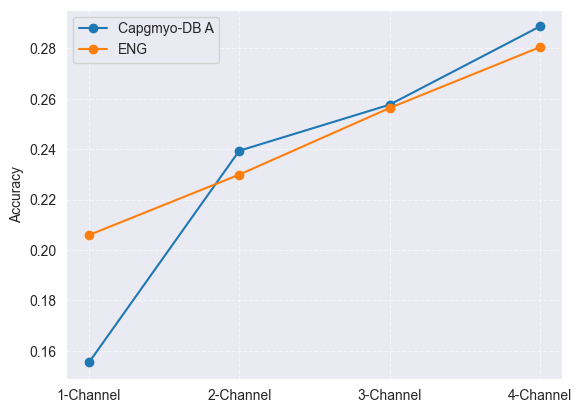

In [28]:
import matplotlib.pyplot as plt

capgmyo_A = [0.15533625777777782,0.23940058333333333,  0.2576754388888889,  0.28874269293414223]
capgmyo_A_std = [0.03057531081066181,  0.03900728778730371,  0.042495222353503705,  0.033214012863790277]
eng_ours = [0.20592691832118565,  0.22991960992415747, 0.25636376980278227, 0.28052006037367714]
eng_ours_std = [0.05375169177908187, 0.08492193274795812, 0.08343234445005425, 0.09487073400413076]

x_label = [f'{i}-Channel' for i in range(1,5)]
x = range(len(x_label))

#plt.errorbar(x, capgmyo, yerr=capgmyo_std, fmt='o-', capsize=5, label="Capgmyo")
#plt.errorbar(x, eng_ours, yerr=eng_ours_std, fmt='o-', capsize=5, label="ENG Ours")
plt.plot(x, capgmyo_A, marker='o', label="Capgmyo-DB A")
plt.plot(x, eng_ours, marker='o', label="ENG")

plt.xticks(x, x_label)
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


anp.array(acc_lst_ch3)atotal 10 sessions - training on 9 / testing on 1

ours: